<a href="https://colab.research.google.com/github/suryawanshi-harshal/congressional-analysis/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/gendo102/congressional-analysis/blob/main/Assignment_1.ipynb

In [ ]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

**Hypothesis**

**The majority of Black, American Indian and Asians are affiliated with a Democratic congressional district while majority of Whites are affiliated with a Republican congressional district.**



In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. 
#adding in race total--B02001_001E
#white alone--B02001_002E
#black alone--B02001_003E
#American Indian alone--B02001_004E
#Asian alone--B02001_005E
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E&for=congressional%20district:*&in=state:*"


# store the response of URL
response = urlopen(url)

# storing the JSON response from url in data
data_json = json.loads(response.read())
data_json.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.


# Hand populate the columns based on the variable descriptions census.gov documents here: https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total Race','White', 'Black', 'American Indian', 'Asian','State Code', 'District Number']

acs_df = pd.DataFrame(data_json, columns = cols)
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
#acs_df['district number'] = pd.to_numeric(acs_df['district number'])
acs_df.head()


,District Name,Total Race,White,Black,American Indian,Asian,State Code,District Number,District,State
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,26,10,Congressional District 10 (116th Congress),Michigan
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,28,04,Congressional District 4 (116th Congress),Mississippi
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,26,14,Congressional District 14 (116th Congress),Michigan
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,26,01,Congressional District 1 (116th Congress),Michigan
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,28,03,Congressional District 3 (116th Congress),Mississippi


In [ ]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Race"] = pd.to_numeric(acs_df["Total Race"])
acs_df["White"] = pd.to_numeric(acs_df["White"])
acs_df["Black"] = pd.to_numeric(acs_df["Black"])
acs_df["American Indian"] = pd.to_numeric(acs_df["American Indian"])
acs_df["Asian"] = pd.to_numeric(acs_df["Asian"])
acs_df["State Code"] = pd.to_numeric(acs_df["State Code"])
acs_df["District Number"] = pd.to_numeric(acs_df["District Number"])

acs_df['State'] = acs_df['State'].str.strip()
acs_df.head()

,District Name,Total Race,White,Black,American Indian,Asian,State Code,District Number,District,State
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,26,10,Congressional District 10 (116th Congress),Michigan
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,28,4,Congressional District 4 (116th Congress),Mississippi
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,26,14,Congressional District 14 (116th Congress),Michigan
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,26,1,Congressional District 1 (116th Congress),Michigan
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,28,3,Congressional District 3 (116th Congress),Mississippi


In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['District Number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['District Number'] = party_df['District Number'].fillna(0)
party_df['District Number'] = pd.to_numeric(party_df['District Number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "District Number"]]

party_df.head(5)

,State,Party,District Number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


In [ ]:
# Merge is like a sql natural join. We are joining on the State and District numbers being the same between the two sets.
merged_df = pd.merge(acs_df, party_df, on=["State", "District Number"])
merged_df

,District Name,Total Race,White,Black,American Indian,Asian,State Code,District Number,District,State,Party
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,26,10,Congressional District 10 (116th Congress),Michigan,R
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,28,4,Congressional District 4 (116th Congress),Mississippi,R
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,26,14,Congressional District 14 (116th Congress),Michigan,D
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,26,1,Congressional District 1 (116th Congress),Michigan,R
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,28,3,Congressional District 3 (116th Congress),Mississippi,R
...,...,...,...,...,...,...,...,...,...,...,...
430,"Congressional District 6 (116th Congress), Mis...",788813,674961,38689,3098,11602,29,6,Congressional District 6 (116th Congress),Missouri,R
431,"Congressional District 7 (116th Congress), Mis...",799499,687776,8683,4574,10931,29,7,Congressional District 7 (116th Congress),Missouri,R
432,"Congressional District 5 (116th Congress), Mic...",664225,492088,116530,1811,5028,26,5,Congressional District 5 (116th Congress),Michigan,D
433,"Congressional District 6 (116th Congress), Mic...",720214,574211,56700,3813,11536,26,6,Congressional District 6 (116th Congress),Michigan,R


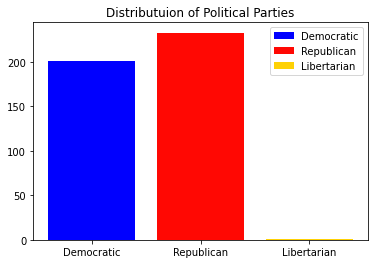

There are 201 Democrats and 233 Republicans and 1 Libertarian.


In [ ]:
warnings.filterwarnings('ignore')

plt.bar(x = 'Democratic', height = merged_df['Party'].value_counts()[1], color = '#0000ff', label = 'Democratic')
plt.bar(x = 'Republican', height = merged_df['Party'].value_counts()[0], color = '#ff0803', label = 'Republican')
plt.bar(x = 'Libertarian', height = merged_df['Party'].value_counts()[2], color = '#fed105', label = 'Libertarian')
plt.title('Distributuion of Political Parties')
plt.legend()
plt.show()
print(f'''There are {merged_df['Party'].value_counts()[1]} Democrats and {merged_df['Party'].value_counts()[0]} Republicans and {merged_df['Party'].value_counts()[2]} Libertarian.''')


In [ ]:
#subset of merged_df for columns we want to plot
new_df_counts = merged_df[['White', 'Black', 'American Indian', 'Asian', 'Party', 'State']]
#new_df_counts.head()

**The majority of individuals that chose White as their race were in Republican congressional districts.**

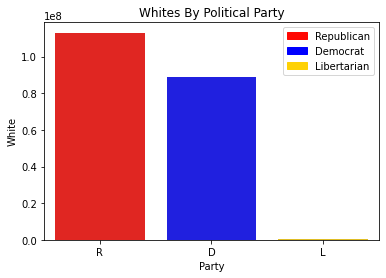

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "White", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Whites By Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()


**The majority of individuals that chose Black as their race were in Democratic congressional districts.**

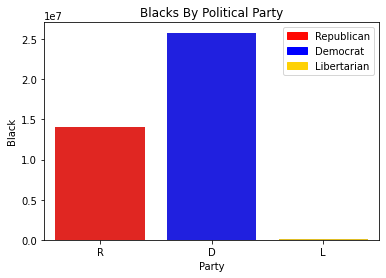

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "Black", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Blacks By Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

**The majority of individuals that chose American Indians as their race were in Democratic congressional districts.**

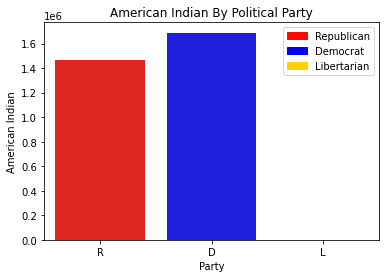

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "American Indian", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("American Indian By Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

**The majority of individuals that chose Asian as their race were in Democratic congressional districts.**

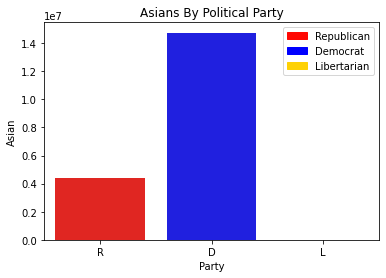

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "Asian", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Asians By Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

In [ ]:
#pivoting subset data to aggregate by state
pivot_df = new_df_counts.pivot_table(index='State', columns='Party', values= ['White', 'Black', 'American Indian', 'Asian'], aggfunc='sum')
#pivot_df

In [ ]:
#pivoting subset data to show counts of individuals with respect to party categorized by race
pivot_df_party_race = new_df_counts.pivot_table(index='Party', values = ['White', 'Black', 'American Indian', 'Asian'],aggfunc='sum')


#proportion table of pivoted data
for party in ['D', 'L', 'R']:
    pivot_df_party_race.loc[party] = pivot_df_party_race.loc[party].div(pivot_df_party_race.loc[party].sum())

pivot_df_party_race = pivot_df_party_race.mul(100)
print(pivot_df_party_race)

       American Indian      Asian      Black      White
Party                                                  
D             1.285851  11.223465  19.657503  67.833180
L             0.331814   2.709444   9.018484  87.940259
R             1.103310   3.288405  10.553431  85.054854


**Distribution of races with respect to party. We can see that for all the political parties chosen, majority of respondents were white.**

In [ ]:
pivot_df_party_race.style.background_gradient(cmap='YlGn', low=0, high=1, axis=0, vmin=0, vmax=100)

,American Indian,Asian,Black,White
Party,,,,
D,1.285851,11.223465,19.657503,67.833180
L,0.331814,2.709444,9.018484,87.940259
R,1.103310,3.288405,10.553431,85.054854


**This plot shows the breakdown of individuals responses summarized by state, race and political party. It shows by state how the race and political party combinations are distributed. For instance, we can see that Texas has a lot of white Republicans and California has a lot of white Democrats.**

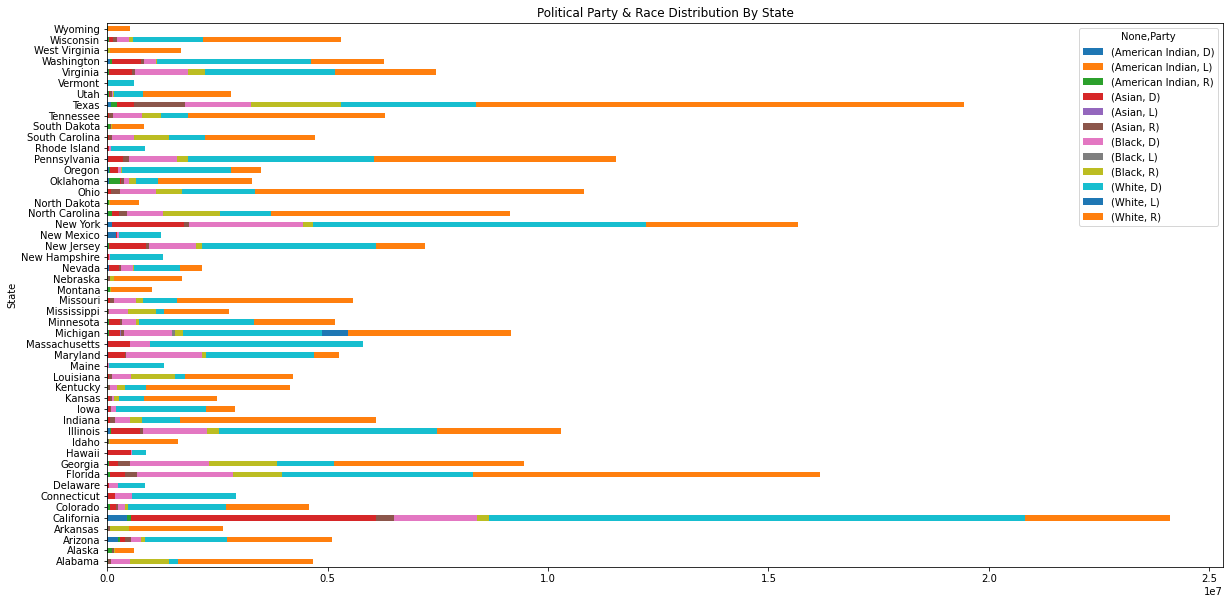

In [ ]:

warnings.filterwarnings('ignore')
pivot_df.plot(
    kind = 'barh',
    stacked = True,
    title = 'Political Party & Race Distribution By State',
    mark_right = True,
    figsize=(20, 10))